### DEEP LEARNING WORKSHOP
#### BASU 9,MAY,2019
#### Moein Hasani,Amin Nasim Saravi

## Classification on MNIST and CIFAR10 with Neural Networks - Keras

### Import Libraries

In [2]:
%matplotlib inline

In [3]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (5,5) # Make the figures a bit bigger

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

Using TensorFlow backend.


### Loading the data

In [4]:
nb_classes = 10

# the data, shuffled and split between tran and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)

X_train original shape (60000, 28, 28)
y_train original shape (60000,)


In [4]:
y_train[0]

5

Let's look at some examples of the training data

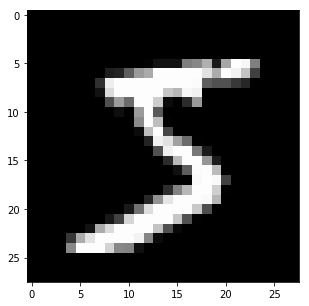

In [6]:
plt.imshow(X_train[0] ,interpolation='none',cmap='gray')

In [44]:
print(X_train[0].shape)
print(X_train[0],y_train[0])


(28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 2

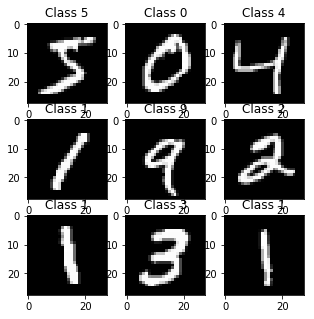

In [32]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[i]))

### Normalize and reshape the data for training
Our neural-network is going to take a single vector for each training example, so we need to reshape the input so that each 28x28 image becomes a single 784 dimensional vector. We'll also scale the inputs to be in the range [0-1] rather than [0-255]

In [7]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


#### One-hot encoded data

**Problem with label encoding is that it assumes higher the categorical value, better the category**


The network assumes that if we average the features from 4 and 2 we should achieve the 3,by encoding the labels we avoid this kind of reasoning.

Modify the target matrices to be in the one-hot format, i.e.

```
0 -> [1, 0, 0, 0, 0, 0, 0, 0, 0]
1 -> [0, 1, 0, 0, 0, 0, 0, 0, 0]
2 -> [0, 0, 1, 0, 0, 0, 0, 0, 0]
etc.
```

In [5]:
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [6]:
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

### Designing the neural network
Build the neural-network. Here we'll do a simple 3 layer fully connected network.


#### softmax function formula

$ y_c = \varsigma(\mathbf{z})_c = \frac{e^{z_c}}{\sum_{d=1}^C e^{z_d}} \quad \text{for} \; c = 1 \cdots C $

C is the number of classes ,in our case it is 10 (zero to nine).

In [10]:
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu')) # An "activation" is just a non-linear function applied to the output
                              # of the layer above. Here, with a "rectified linear unit",
                              # we clamp all values below 0 to 0.
        
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax')) # This special "softmax" activation among other things,
                                 # ensures the output is a valid probaility distribution, that is
                                 # that its values are all non-negative and sum to 1.

In [11]:
#model.load(mnist_weights.h5)

### Compile the model
Keras is built on top of Theano (and now TensorFlow as well), both packages that allow you to define a *computation graph* in Python, which they then compile and run efficiently on the CPU or GPU without the overhead of the Python interpreter.

When compiing a model, Keras asks you to specify your **loss function** and your **optimizer**. The loss function we'll use here is called *categorical crossentropy*, and is a loss function well-suited to comparing two probability distributions.

Here our predictions are probability distributions across the ten different digits (e.g. "we're 80% confident this image is a 3, 10% sure it's an 8, 5% it's a 2, etc."), and the target is a probability distribution with 100% for the correct category, and 0 for everything else. The cross-entropy is a measure of how different your predicted distribution is from the target distribution. [More detail at Wikipedia](https://en.wikipedia.org/wiki/Cross_entropy)

The optimizer helps determine how quickly the model learns, how resistent it is to getting "stuck" or "blowing up". We won't discuss this in too much detail, but "adam" is often a good choice (developed here at U of T).

In [12]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(patience=3,monitor='val_loss', mode='min', verbose=1)

### Train the model!
This is the fun part: you can feed the training data loaded in earlier into this model and it will learn to classify digits

In [13]:
import time;  # This is required to include time module.

startTime = time.time()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history=model.fit(X_train, Y_train,batch_size=64, epochs=20,verbose=1,validation_split=0.2,callbacks=[es])

endTime = time.time()

print("\nIt took {:.2f}s to train the model for accuracy of {:.2f} ".format(endTime-startTime,history.history['val_acc'][-1]))


Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 8s 157us/step - loss: 0.2111 - acc: 0.9359 - val_loss: 0.1221 - val_acc: 0.9640
Epoch 2/20
48000/48000 [==============================] - 7s 143us/step - loss: 0.0823 - acc: 0.9754 - val_loss: 0.0974 - val_acc: 0.9706
Epoch 3/20
48000/48000 [==============================] - 7s 155us/step - loss: 0.0542 - acc: 0.9825 - val_loss: 0.0930 - val_acc: 0.9732
Epoch 4/20
48000/48000 [==============================] - 7s 156us/step - loss: 0.0402 - acc: 0.9868 - val_loss: 0.1034 - val_acc: 0.9735
Epoch 5/20
48000/48000 [==============================] - 7s 152us/step - loss: 0.0299 - acc: 0.9903 - val_loss: 0.0890 - val_acc: 0.9765
Epoch 6/20
48000/48000 [==============================] - 7s 145us/step - loss: 0.0253 - acc: 0.9918 - val_loss: 0.0922 - val_acc: 0.9769
Epoch 7/20
48000/48000 [==============================] - 7s 141us/step - loss: 0.0248 - acc: 0.9919 - val_loss: 0.0992 - 

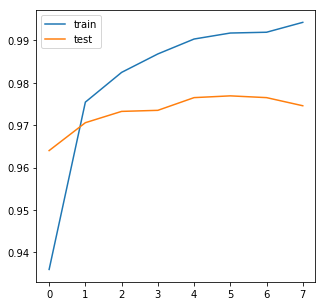

In [14]:
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='test')
plt.legend()
plt.show()

### Finally, evaluate its performance

In [15]:
print("Test accuracy: {:.2f} ".format(model.evaluate(X_test, Y_test, verbose=0)[1]))

Test accuracy: 0.98 


### Inspecting the output

It's always a good idea to inspect the output and make sure everything looks sane. Here we'll look at some examples it gets right, and some examples it gets wrong.

In [16]:
# The predict_classes function outputs the highest probability class
# according to the trained classifier for each input example.
predicted_classes = model.predict_classes(X_test)

# Check which items we got right / wrong
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

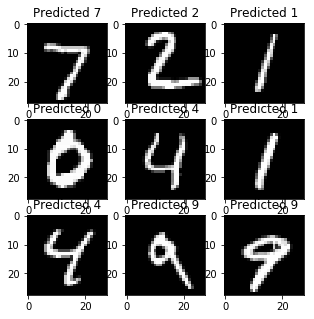

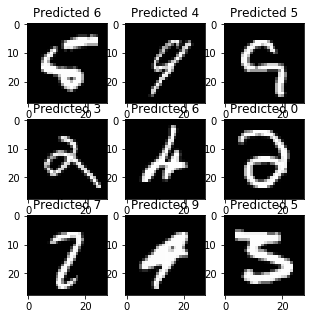

In [17]:
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}".format(predicted_classes[correct], y_test[correct]))

plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}".format(predicted_classes[incorrect], y_test[incorrect]))

#### Saving the model weights

In [18]:
model.save('mnist_weights.h5')

## Why ANNs are not enough

In [7]:
from keras.datasets import cifar10,fashion_mnist
(X_train2, y_train2), (X_test2, y_test2) = cifar10.load_data()
print("Training matrix shape", X_train2.shape)
print("Testing matrix shape", X_test2.shape)

Training matrix shape (50000, 32, 32, 3)
Testing matrix shape (10000, 32, 32, 3)


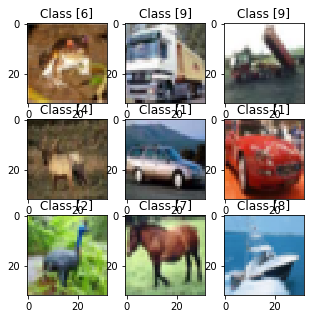

In [8]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train2[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train2[i]))

### load data and normalize

In [21]:
X_train2 = X_train2.reshape(50000, 3072)
X_test2 = X_test2.reshape(10000, 3072)
X_train2 = X_train2.astype('float32')
X_test2 = X_test2.astype('float32')
X_train2 /= 255
X_test2 /= 255
print("Training matrix shape", X_train2.shape)
print("Testing matrix shape", X_test2.shape)

Training matrix shape (50000, 3072)
Testing matrix shape (10000, 3072)


### one hot encoding

In [22]:
Y_train2 = np_utils.to_categorical(y_train2, nb_classes)
Y_test2 = np_utils.to_categorical(y_test2, nb_classes)

In [23]:
model2 = Sequential()
model2.add(Dense(512, input_shape=(3072,)))
model2.add(Activation('relu')) # An "activation" is just a non-linear function applied to the output
                              # of the layer above. Here, with a "rectified linear unit",
                              # we clamp all values below 0 to 0.
model2.add(Dense(512))
model2.add(Activation('relu'))
model2.add(Dense(10))
model2.add(Activation('softmax')) # This special "softmax" activation among other things,
                                 # ensures the output is a valid probaility distribution, that is
                                 # that its values are all non-negative and sum to 1.

In [24]:
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [25]:
es2 = EarlyStopping(patience=3,monitor='val_loss', mode='min', verbose=1)

In [26]:
history2=model2.fit(X_train2, Y_train2,batch_size=64, epochs=50,verbose=1,validation_split=0.2,callbacks=[es2])

Train on 40000 samples, validate on 10000 samples
Epoch 1/50
40000/40000 [==============================] - 16s 390us/step - loss: 1.8735 - acc: 0.3255 - val_loss: 1.7742 - val_acc: 0.3629
Epoch 2/50
40000/40000 [==============================] - 16s 398us/step - loss: 1.6830 - acc: 0.3992 - val_loss: 1.6473 - val_acc: 0.4166
Epoch 3/50
40000/40000 [==============================] - 16s 398us/step - loss: 1.5967 - acc: 0.4296 - val_loss: 1.6301 - val_acc: 0.4204
Epoch 4/50
40000/40000 [==============================] - 16s 392us/step - loss: 1.5350 - acc: 0.4477 - val_loss: 1.5653 - val_acc: 0.4419
Epoch 5/50
40000/40000 [==============================] - 16s 392us/step - loss: 1.4886 - acc: 0.4681 - val_loss: 1.5746 - val_acc: 0.4466
Epoch 6/50
40000/40000 [==============================] - 16s 395us/step - loss: 1.4582 - acc: 0.4802 - val_loss: 1.5248 - val_acc: 0.4570
Epoch 7/50
40000/40000 [==============================] - 15s 383us/step - loss: 1.4179 - acc: 0.4925 - val_loss: 1.

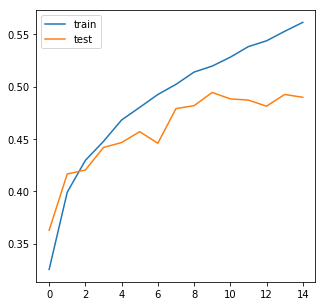

In [28]:
plt.plot(history2.history['acc'], label='train')
plt.plot(history2.history['val_acc'], label='test')
plt.legend()
plt.show()

In [29]:
print("Test accuracy: {:.2f} ".format(model2.evaluate(X_test2, Y_test2, verbose=0)[1]))

Test accuracy: 0.48 


### Accuracy is not good at all :( we will see in the next session that we should use another type of NNs called Convolutional Nueral networks for this porblem to increase the accuracy dramatically!

There are lots of other great examples at the Keras homepage at http://keras.io and in the source code at https://github.com/fchollet/keras